In [284]:
import numpy as np
import matplotlib.pyplot as plt


In [285]:
m = 1
e = -1
w_x = 3
w_y = 3
a = 1
def f1_x(r1:list,r2:list):
    x1 = r1[0]
    y1 = r1[1]
    x2 = r2[0]
    y2 = r2[1]
    distance = np.sqrt((x2-x1)**2+(y2-y1)**2+ a**2)
    return -1*(-1*m*w_x**2 *x1 - e**2/(2*distance**(3/2)) *2*(x1-x2) )

def f2_x(r1:list,r2:list):
    x1 = r1[0]
    y1 = r1[1]
    x2 = r2[0]
    y2 = r2[1]
    distance = np.sqrt((x2-x1)**2+(y2-y1)**2+ a**2)
    return -1*(-1*m*w_x**2 *x2 + e**2/(2*distance**(3/2)) *2*(x1-x2) )


def f1_y(r1:list,r2:list):
    x1 = r1[0]
    y1 = r1[1]
    x2 = r2[0]
    y2 = r2[1]
    distance = np.sqrt((x2-x1)**2+(y2-y1)**2+ a**2)
    return -1*(-1*m*w_y**2 *y1 - e**2/(2*distance**(3/2)) *2*(y1-y2) )

def f2_y(r1:list,r2:list):
    x1 = r1[0]
    y1 = r1[1]
    x2 = r2[0]
    y2 = r2[1]
    distance = np.sqrt((x2-x1)**2+(y2-y1)**2+ a**2)
    return -1*(-1*m*w_y**2 *y2 + e**2/(2*distance**(3/2)) *2*(y1-y2) )

def f1(r1, r2):
    return np.array([f1_x(r1,r2), f1_y(r1,r2)])

def f2(r1, r2):
    return np.array([f2_x(r1,r2), f2_y(r1,r2)])

def f1_lorentz(q, v1, B_z):
    return np.array([q*v1[1]*B_z, -q*(v1[0]*B_z)])

def f2_lorentz(q, v2, B_z):
    return np.array([q*v2[1]*B_z, -q*(v2[0]*B_z)])



In [286]:
n = 3000


# Electron 1 start at (-1,-1) and has a initial velocity in (0.1,0.1) direction

r1 = np.ones((n,2))*-1

# Electron 2 start at (1,1) and has a initial velocity in (-0.1,-0.1) direction
r2 = np.ones((n,2))*1

omegaX = w_x
omegaY = w_y
omegaC = 1
softening = 1

Q = -1

t_final = 50
t_0 = 0
dt = (t_final-t_0)/n

threshold = 100


In [287]:
def v1x (r1, r2, v):
    x1 = r1[0]
    x2 = r2[0]
    y1 = r1[1]
    y2 = r2[1]
    vx = v[0]
    vy = v[1]
    coulomb_effect = Q*((e**2*(x1-x2))*((x1-x2)**2+(y1-y2)**2+softening**2)**(-1.5))

    return dt*(omegaX**2*x1 +coulomb_effect + (e*vy*omegaC))+ vx

def v1y (r1, r2, v):
    x1 = r1[0]
    x2 = r2[0]
    y1 = r1[1]
    y2 = r2[1]
    vx = v[0]
    vy = v[1]
    coulomb_effect = Q*((e**2*(y1-y2))*((x1-x2)**2+(y1-y2)**2+softening**2)**(-1.5))

    return dt*(-omegaY**2*y1 + coulomb_effect - (e*vx*omegaC))+ vy

# Particle 2

def v2x (r1, r2, v):
    x1 = r1[0]
    x2 = r2[0]
    y1 = r1[1]
    y2 = r2[1]
    vx = v[0]
    vy = v[1]
    coulomb_effect = Q*((e**2*(x1-x2))*((x1-x2)**2+(y1-y2)**2+softening**2)**(-1.5))
    return dt*(omegaX**2*x2 - coulomb_effect + (e*vy*omegaC))+ vx

def v2y (r1, r2, v):
    x1 = r1[0]
    x2 = r2[0]
    y1 = r1[1]
    y2 = r2[1]
    vx = v[0]
    vy = v[1]
    coulomb_effect = Q*((e**2*(y1-y2))*((x1-x2)**2+(y1-y2)**2+softening**2)**(-1.5))

    return dt*(-omegaY**2*y2 - coulomb_effect - (e*vx*omegaC))+ vy

In [288]:
v1 = [5, 5]
v2 = [-5, -5]
for i in range(0, threshold-1):

    if(i==0 ):
        v1 = [10, 10]
    else:
        v1 = [v1x(r1[i], r2[i], v1), v1y(r1[i], r2[i], v1)]
    r1[i+1] = r1[i] +v1*np.ones_like(v1)*dt
    print(f"before e1 ri+1={r1[i+1]}")
    print(f"before e2 ri+1={r2[i+1]}")
for i in range(threshold-1, n-1):
    if(i==threshold-1):
        v2 = [-10, -10]
    else:
        v2 = [v2x(r1[i], r2[i], v2), v2y(r1[i], r2[i], v2)]
    v1 = [v1x(r1[i], r2[i], v1), v1y(r1[i], r2[i], v1)]
    r1[i+1] = r1[i] +v1*np.ones_like(v1)*dt
    print(f"after e1 ri+1={r1[i+1]}")
    r2[i+1] = r2[i] +v2*np.ones_like(v2)*dt
    print(f"after e2 ri+1={r2[i+1]}")
    

before e1 ri+1=[-0.83333333 -0.83333333]
before e2 ri+1=[1. 1.]
before e1 ri+1=[-0.67150405 -0.66178182]
before e2 ri+1=[1. 1.]
before e1 ri+1=[-0.51418505 -0.4858512 ]
before e2 ri+1=[1. 1.]
before e1 ri+1=[-0.36105109 -0.30605198]
before e2 ri+1=[1. 1.]
before e1 ri+1=[-0.21177756 -0.12289811]
before e2 ri+1=[1. 1.]
before e1 ri+1=[-0.06603929  0.06309421]
before e2 ri+1=[1. 1.]
before e1 ri+1=[0.07649058 0.25140749]
before e2 ri+1=[1. 1.]
before e1 ri+1=[0.21614156 0.44152322]
before e2 ri+1=[1. 1.]
before e1 ri+1=[0.35324573 0.63292068]
before e2 ri+1=[1. 1.]
before e1 ri+1=[0.48813589 0.82507359]
before e2 ri+1=[1. 1.]
before e1 ri+1=[0.62114058 1.01744506]
before e2 ri+1=[1. 1.]
before e1 ri+1=[0.75257797 1.20948569]
before e2 ri+1=[1. 1.]
before e1 ri+1=[0.88275528 1.40064314]
before e2 ri+1=[1. 1.]
before e1 ri+1=[1.01197912 1.59038115]
before e2 ri+1=[1. 1.]
before e1 ri+1=[1.14056848 1.77819223]
before e2 ri+1=[1. 1.]
before e1 ri+1=[1.26886023 1.96359667]
before e2 ri+1=[1. 

In [289]:
"""

for i in range(1, threshold-1):

    if(i==1 ):
        v1 = [5, 5]
    else:
        v1 = (r1[i]-r1[i-1])/dt
    r1[i+1] = (f1(r1[i], r2[i])+f1_lorentz(e,v1,1 )) * dt**2/m +2*r1[i]-r1[i-1]
for i in range(threshold-1, t_final):
    if(i==threshold-1):
        v2 = [-5, -5]
    else:
        v2 = (r2[i]-r2[i-1])/dt
    v1 = (r1[i]-r1[i-1])/dt
    r1[i+1] = (f1(r1[i], r2[i])+f1_lorentz(e,v1,1 )) * dt**2/m +2*r1[i]-r1[i-1]
    r2[i+1] = (f2(r1[i], r2[i])+f2_lorentz(e,v2,1 )) * dt**2/m +2*r2[i]-r2[i-1]"""
    

'\n\nfor i in range(1, threshold-1):\n\n    if(i==1 ):\n        v1 = [5, 5]\n    else:\n        v1 = (r1[i]-r1[i-1])/dt\n    r1[i+1] = (f1(r1[i], r2[i])+f1_lorentz(e,v1,1 )) * dt**2/m +2*r1[i]-r1[i-1]\nfor i in range(threshold-1, t_final):\n    if(i==threshold-1):\n        v2 = [-5, -5]\n    else:\n        v2 = (r2[i]-r2[i-1])/dt\n    v1 = (r1[i]-r1[i-1])/dt\n    r1[i+1] = (f1(r1[i], r2[i])+f1_lorentz(e,v1,1 )) * dt**2/m +2*r1[i]-r1[i-1]\n    r2[i+1] = (f2(r1[i], r2[i])+f2_lorentz(e,v2,1 )) * dt**2/m +2*r2[i]-r2[i-1]'

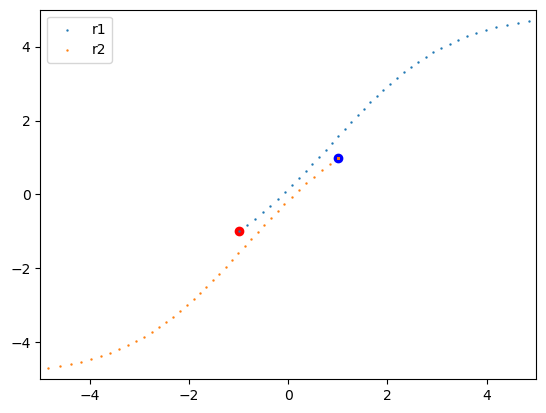

In [290]:
t_a = np.linspace(0,t_final,n)

r1_x = [r1_t[0] for r1_t in r1]
r1_y = [r1_t[1] for r1_t in r1]

r2_x = [r2_t[0] for r2_t in r2]
r2_y = [r2_t[1] for r2_t in r2]
plt.scatter(-1, -1, c="r")
plt.scatter(1, 1, c="b")
plt.scatter(r1_x, r1_y,s=0.5,label="r1")
plt.scatter(r2_x,r2_y,s=0.5,label="r2")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
